Question 4 (Analysis of Variance)



Factor Variable with >= 4 Levels --> Quality
Quality scores in red wine range from 3 to 8 so it has 6 levels

Compare mean alcohol content across quality groups

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

#load dataset
df = pd.read_csv("winequality-red.csv", sep=';')

# treat quality as categorical factor
df['quality'] = df['quality'].astype('category')

# one-way ANOVA model
model = ols("alcohol ~ C(quality)", data=df).fit()
anova_table = sm.stats.anova_lm(model)

anova_table


,df,sum_sq,mean_sq,F,PR(>F)
C(quality),5.0,483.937982,96.787596,115.854797,1.209895e-104
Residual,1593.0,1330.826555,0.835422,NaN,NaN


Critical Value and Rejection Region

In [2]:
from scipy.stats import f

alpha = 0.05
df_between = anova_table['df'][0]      #5
df_within  = anova_table['df'][1]      #1593

f_critical = f.ppf(1 - alpha, df_between, df_within)
f_critical


/var/folders/4w/0tf1rvvj5yg976d8yny0tfww0000gn/T/ipykernel_82176/3004766082.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_between = anova_table['df'][0]      #5
/var/folders/4w/0tf1rvvj5yg976d8yny0tfww0000gn/T/ipykernel_82176/3004766082.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_within  = anova_table['df'][1]      #1593


np.float64(2.2197153772718785)

ANOVA Assumption Checks

/var/folders/4w/0tf1rvvj5yg976d8yny0tfww0000gn/T/ipykernel_82176/497340292.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quality_groups = df.groupby('quality')['alcohol'].apply(list)
/var/folders/4w/0tf1rvvj5yg976d8yny0tfww0000gn/T/ipykernel_82176/497340292.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(quality_groups.values, labels=quality_groups.index)


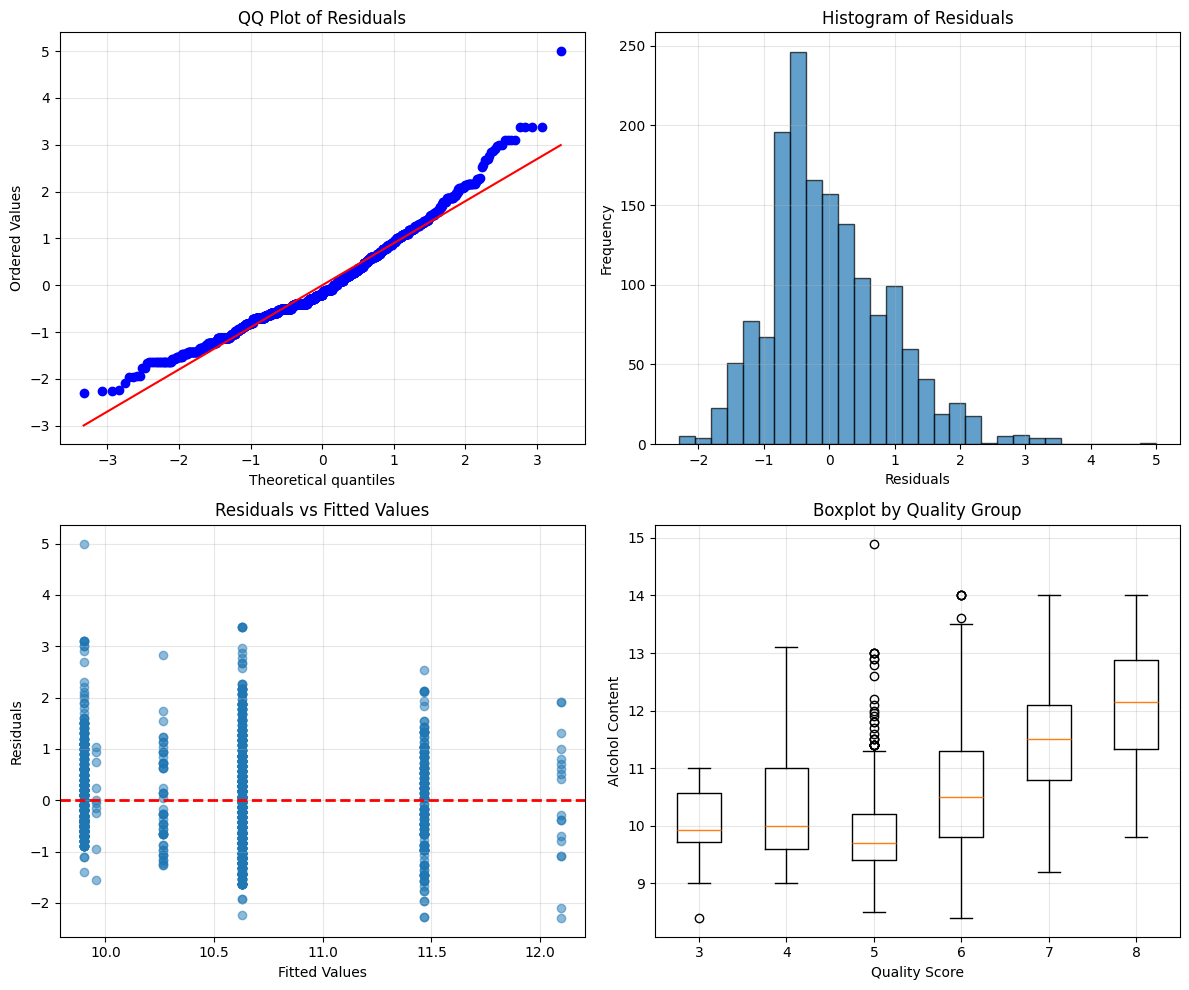

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

#residuals from the model
residuals = model.resid

#fitted values
fitted_values = model.fittedvalues

#subplots for assumption checks
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#1. normality: QQ plot
stats.probplot(residuals, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('QQ Plot of Residuals')
axes[0, 0].grid(True, alpha=0.3)

#2. normality: Histogram of residuals
axes[0, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Residuals')
axes[0, 1].grid(True, alpha=0.3)

# 3.equal variance: residuals vs fitted values
axes[1, 0].scatter(fitted_values, residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals vs Fitted Values')
axes[1, 0].grid(True, alpha=0.3)

#4. equal variance: boxplots by group
quality_groups = df.groupby('quality')['alcohol'].apply(list)
axes[1, 1].boxplot(quality_groups.values, labels=quality_groups.index)
axes[1, 1].set_xlabel('Quality Score')
axes[1, 1].set_ylabel('Alcohol Content')
axes[1, 1].set_title('Boxplot by Quality Group')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Assumption 1 - Independence:**  
Each wine sample is assumed to be independently collected.

**Assumption 2 - Normality of Residuals:**
- QQ Plot: Points follow the reference line reasonably well, suggesting approximate normality.
- Histogram: The residuals appear roughly bell-shaped and symmetric.

**Assumption 3 - Equal Variances (Homoscedasticity):**
- Residuals vs Fitted: The spread of residuals is relatively constant across fitted values.
- Boxplots: The groups show similar spread, though some variation exists.

**Conclusion:** The ANOVA assumptions are reasonably satisfied. ANOVA is robust to minor violations with balanced designs and large sample sizes.

Conclusion and Next Steps

In [4]:
# Extract test results
f_statistic = anova_table['F'][0]
p_value = anova_table['PR(>F)'][0]

print("ANOVA Test Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Critical value (α = {alpha}): {f_critical:.4f}")
print(f"Rejection region: F > {f_critical:.4f}")
print(f"\nDecision rule: Reject H₀ if p-value < α = {alpha}")

if p_value < alpha:
    print(f"\nDecision: REJECT H₀ (p-value = {p_value:.4f} < {alpha})")
    print(f"\nConclusion in context:")
    print(f"At the {alpha} significance level, there is sufficient evidence to conclude")
    print(f"that mean alcohol content differs significantly across quality groups.")
    print(f"\nNext Steps:")
    print(f"Since we rejected the null hypothesis, we need to perform post-hoc pairwise")
    print(f"comparisons (e.g., Tukey's HSD test) to determine which specific quality groups")
    print(f"have significantly different mean alcohol content.")
else:
    print(f"\nDecision: FAIL TO REJECT H₀ (p-value = {p_value:.4f} ≥ {alpha})")
    print(f"\nConclusion in context:")
    print(f"At the {alpha} significance level, there is insufficient evidence to conclude")
    print(f"that mean alcohol content differs across quality groups.")
    print(f"\nNext Steps:")
    print(f"No further pairwise comparisons are needed since we failed to detect")
    print(f"a significant difference among the groups.")

ANOVA Test Results:
F-statistic: 115.8548
p-value: 0.0000
Critical value (α = 0.05): 2.2197
Rejection region: F > 2.2197

Decision rule: Reject H₀ if p-value < α = 0.05

Decision: REJECT H₀ (p-value = 0.0000 < 0.05)

Conclusion in context:
At the 0.05 significance level, there is sufficient evidence to conclude
that mean alcohol content differs significantly across quality groups.

Next Steps:
Since we rejected the null hypothesis, we need to perform post-hoc pairwise
comparisons (e.g., Tukey's HSD test) to determine which specific quality groups
have significantly different mean alcohol content.


/var/folders/4w/0tf1rvvj5yg976d8yny0tfww0000gn/T/ipykernel_82176/2438126261.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_statistic = anova_table['F'][0]
/var/folders/4w/0tf1rvvj5yg976d8yny0tfww0000gn/T/ipykernel_82176/2438126261.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
